In [102]:
# import pandas as pd for data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [131]:
df = pd.read_csv('CHD.csv')
df_org = df.copy() # make a copy of the original data frame
display(df)

,CHD,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No,Yes,Yes,Yes,40,Yes,No,No,No,No,...,Yes,No,Excellent,18,15,Yes,Female,55-59,4,3
1,No,No,No,No,25,Yes,No,No,Yes,No,...,No,Yes,Good,0,0,No,Female,80 or older,6,1
2,No,Yes,Yes,Yes,28,No,No,No,No,Yes,...,Yes,Yes,Excellent,30,30,Yes,Female,65-69,4,8
3,No,Yes,No,Yes,27,No,No,No,Yes,Yes,...,Yes,No,Fair,0,0,No,Female,75-79,3,6
4,No,Yes,Yes,Yes,24,No,No,No,Yes,Yes,...,Yes,No,Fair,3,0,No,Female,40-44,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,No,Yes,Yes,Yes,45,No,No,No,No,Yes,...,Yes,No,Good,0,5,No,Male,30-34,6,7
253676,No,Yes,Yes,Yes,18,No,No,"No, borderline diabetes",No,No,...,Yes,No,Very good,0,0,Yes,Female,55-59,2,4
253677,No,No,No,Yes,28,No,No,No,Yes,Yes,...,Yes,No,Poor,0,0,No,Female,75-79,5,2
253678,No,Yes,No,Yes,23,No,No,No,No,Yes,...,Yes,No,Good,0,0,No,Male,65-69,5,1


In [132]:
# retrieve all labels and store in a list
columns_df = list(df.columns.values)
# iterate over the list to print all unique values of each column in the dataframe
for column in columns_df:
    print(column, ':', str(df[column].unique()))

CHD : ['No' 'Yes']
HighBP : ['Yes' 'No']
HighChol : ['Yes' 'No']
CholCheck : ['Yes' 'No']
BMI : [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Smoker : ['Yes' 'No']
Stroke : ['No' 'Yes']
Diabetes : ['No' 'No, borderline diabetes' 'Yes']
PhysActivity : ['No' 'Yes']
Fruits : ['No' 'Yes']
Veggies : ['Yes' 'No']
HvyAlcoholConsump : ['No' 'Yes']
AnyHealthcare : ['Yes' 'No']
NoDocbcCost : ['No' 'Yes']
GenHlth : ['Excellent' 'Good' 'Fair' 'Very good' 'Poor']
MentHlth : [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
PhysHlth : [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
DiffWalk : ['Yes' 'No']
Sex : ['Female' 'Male']
Age : ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50

In [133]:
# list of numerical features
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['BMI', 'MentHlth', 'PhysHlth', 'Education', 'Income'], dtype='object')

In [134]:
# list of categorical features
categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['CHD', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age'],
      dtype='object')

In [135]:
# encode 'AgeCategory' column
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['Age'] = df['Age'].apply(lambda x: encode_AgeCategory[x])
df['Age'] = df['Age'].astype(int)
df['Age']

0         57
1         80
2         67
3         77
4         42
          ..
253675    32
253676    57
253677    77
253678    67
253679    47
Name: Age, Length: 253680, dtype: int32

In [136]:
df.describe()[1:][list(numeric_features)].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,28.382364,6.608694,12.000000,24.000000,27.000000,31.000000,98.000000
MentHlth,3.184772,7.412847,0.000000,0.000000,0.000000,2.000000,30.000000
PhysHlth,4.242081,8.717951,0.000000,0.000000,0.000000,3.000000,30.000000
Education,5.050434,0.985774,1.000000,4.000000,5.000000,6.000000,6.000000
Income,6.053875,2.071148,1.000000,5.000000,7.000000,8.000000,8.000000


In [137]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Get a list of categorical column names
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    if len(df[col].unique()) <= 2:
        # label encode binary variables
        df[col] = le.fit_transform(df[col])
    else:
        # one-hot encode non-binary variables
        df = pd.get_dummies(df, columns=[col])

df.head()

,CHD,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,...,Education,Income,Diabetes_No,"Diabetes_No, borderline diabetes",Diabetes_Yes,GenHlth_Excellent,GenHlth_Fair,GenHlth_Good,GenHlth_Poor,GenHlth_Very good
0,0,1,1,1,40,1,0,0,0,1,...,4,3,1,0,0,1,0,0,0,0
1,0,0,0,0,25,1,0,1,0,0,...,6,1,1,0,0,0,0,1,0,0
2,0,1,1,1,28,0,0,0,1,0,...,4,8,1,0,0,1,0,0,0,0
3,0,1,0,1,27,0,0,1,1,1,...,3,6,1,0,0,0,1,0,0,0
4,0,1,1,1,24,0,0,1,1,1,...,5,4,1,0,0,0,1,0,0,0


In [138]:
y = df.iloc[:, 0]  # Assuming the first column is the target variable
X = df.iloc[:, 1:]  # Selecting all columns except the first column
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,Education,Income,Diabetes_No,"Diabetes_No, borderline diabetes",Diabetes_Yes,GenHlth_Excellent,GenHlth_Fair,GenHlth_Good,GenHlth_Poor,GenHlth_Very good
0,1,1,1,40,1,0,0,0,1,0,...,4,3,1,0,0,1,0,0,0,0
1,0,0,0,25,1,0,1,0,0,0,...,6,1,1,0,0,0,0,1,0,0
2,1,1,1,28,0,0,0,1,0,0,...,4,8,1,0,0,1,0,0,0,0
3,1,0,1,27,0,0,1,1,1,0,...,3,6,1,0,0,0,1,0,0,0
4,1,1,1,24,0,0,1,1,1,0,...,5,4,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,1,1,0,...,6,7,1,0,0,0,0,1,0,0
253676,1,1,1,18,0,0,0,0,0,0,...,2,4,0,1,0,0,0,0,0,1
253677,0,0,1,28,0,0,1,1,0,0,...,5,2,1,0,0,0,0,0,1,0
253678,1,0,1,23,0,0,0,1,1,0,...,5,1,1,0,0,0,0,1,0,0


In [139]:
!pip install tab-transformer-pytorch

## 1. Using  FT-Transformer Process Feature Selected 

In [111]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from xgboost import XGBClassifier  # Import XGBoost's XGBClassifier
from sklearn.pipeline import Pipeline

# Assuming X contains your feature columns and y contains the target 'CHD'.
X = df.drop('CHD', axis=1)
y = df['CHD']

# Define the FT-Transformer model with XGBoost classifier (XGBClassifier).
model = Pipeline(steps=[
   ('feature_selector', SelectKBest(k='all')),  # Use 'k' to select top 'k' features.
   ('classifier', XGBClassifier())  # Use XGBoost's XGBClassifier.
])

# Fit the FT-Transformer model to your data.
model.fit(X, y)

# Get the selected features.
selected_features1 = X.columns[model.named_steps['feature_selector'].get_support()]

# Print or use the selected features for further analysis.
print(selected_features1)


Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Sex', 'Age', 'Education', 'Income', 'Diabetes_No',
       'Diabetes_No, borderline diabetes', 'Diabetes_Yes', 'GenHlth_Excellent',
       'GenHlth_Fair', 'GenHlth_Good', 'GenHlth_Poor', 'GenHlth_Very good'],
      dtype='object')


In [112]:
# Get the feature scores.
feature_scores = model.named_steps['feature_selector'].scores_

# Print or use the selected features and their corresponding scores for further analysis.
for feature, score in zip(selected_features1, feature_scores):
    print(f"Feature: {feature}, Score: {score}")

Feature: HighBP, Score: 11628.965846271469
Feature: HighChol, Score: 8569.219931001342
Feature: CholCheck, Score: 496.69640395253623
Feature: BMI, Score: 712.0020905709378
Feature: Smoker, Score: 3366.4578795503407
Feature: Stroke, Score: 10903.340870742286
Feature: PhysActivity, Score: 1948.1558496621817
Feature: Fruits, Score: 99.39391364171728
Feature: Veggies, Score: 389.76177876782214
Feature: HvyAlcoholConsump, Score: 213.38301250088753
Feature: AnyHealthcare, Score: 89.06455937709643
Feature: NoDocbcCost, Score: 244.01440777576857
Feature: MentHlth, Score: 1063.779093202766
Feature: PhysHlth, Score: 8660.85346732673
Feature: DiffWalk, Score: 12021.574331799133
Feature: Sex, Score: 1894.4142978948175
Feature: Age, Score: 0.5955734977797985
Feature: Education, Score: 2541.736461833871
Feature: Income, Score: 5146.509879195233
Feature: Diabetes_No, Score: 8198.136218536047
Feature: Diabetes_No, borderline diabetes, Score: 8231.555128741225
Feature: Diabetes_Yes, Score: 133.88666629

In [113]:
# Create a DataFrame to store the features and their scores.
feature_score_df1 = pd.DataFrame({'Feature': selected_features1, 'Score': feature_scores})

# Calculate the percentage score relative to the maximum score.
max_score = feature_score_df1['Score'].sum()
feature_score_df1['Percentage'] = (feature_score_df1['Score'] / max_score) * 100

# Sort the DataFrame by 'Percentage' in descending order.
feature_score_df_sorted = feature_score_df1.sort_values(by='Percentage', ascending=False)

# Print the sorted DataFrame.
print(feature_score_df_sorted)

                             Feature         Score  Percentage
14                          DiffWalk  12021.574332   11.005265
0                             HighBP  11628.965846   10.645847
5                             Stroke  10903.340871    9.981567
22                 GenHlth_Excellent   9310.601167    8.523478
13                          PhysHlth   8660.853467    7.928661
1                           HighChol   8569.219931    7.844774
20  Diabetes_No, borderline diabetes   8231.555129    7.535655
19                       Diabetes_No   8198.136219    7.505062
26                 GenHlth_Very good   6121.967842    5.604414
18                            Income   5146.509879    4.711421
23                      GenHlth_Fair   3738.592874    3.422530
25                      GenHlth_Poor   3372.499094    3.087386
4                             Smoker   3366.457880    3.081856
17                         Education   2541.736462    2.326857
6                       PhysActivity   1948.155850    1

In [115]:
im2=feature_score_df_sorted
im2['Feature'] = im2['Feature'].str.split('_').str[0]
im2=im2.groupby('Feature').mean().reset_index()
im2

,Feature,Score,Percentage
0,Age,0.595573,0.000545
1,AnyHealthcare,89.064559,0.081535
2,BMI,712.002091,0.651809
3,CholCheck,496.696404,0.454705
4,Diabetes,5521.192671,5.054428
5,DiffWalk,12021.574332,11.005265
6,Education,2541.736462,2.326857
7,Fruits,99.393914,0.090991
8,GenHlth,4536.252332,4.152755
9,HighBP,11628.965846,10.645847


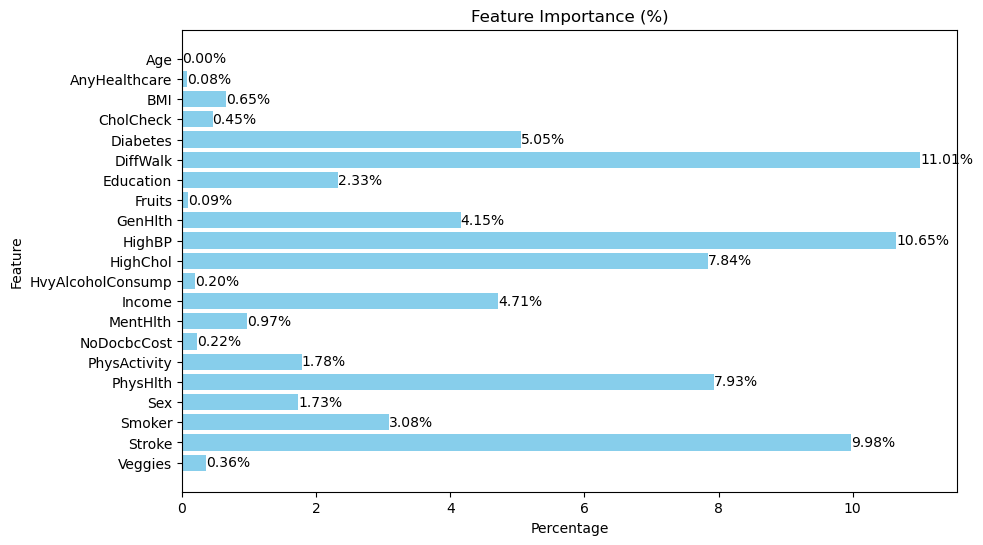

In [116]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
# Create a bar plot to visualize features and percentages.

# Create a bar plot to visualize features and percentages.
plt.figure(figsize=(10, 6))
bars = plt.barh(im2['Feature'], im2['Percentage'], color='skyblue')
plt.xlabel('Percentage')
plt.ylabel('Feature')
plt.title('Feature Importance (%)')

# Annotate bars with their corresponding percentages.
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{width:.2f}%', xy=(width, bar.get_y() + bar.get_height() / 2), va='center', fontsize=10)

plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top.
plt.show()

In [117]:
# Difficult Walking  ,HighChol,Stroke,HighBP,Physical Health,
im2=im2.sort_values(by='Percentage', ascending=False)
print('TOP 10 Features is'+'  '+ im2[0:9]['Feature'])
FTT10=im2[0:9]['Feature']

5     TOP 10 Features is  DiffWalk
9       TOP 10 Features is  HighBP
19      TOP 10 Features is  Stroke
16    TOP 10 Features is  PhysHlth
10    TOP 10 Features is  HighChol
4     TOP 10 Features is  Diabetes
12      TOP 10 Features is  Income
8      TOP 10 Features is  GenHlth
18      TOP 10 Features is  Smoker
Name: Feature, dtype: object


# Using XGBoost Feature Selected

In [77]:
#XG
import pandas as pd
from xgboost import XGBClassifier
# Load the dataset
data = df  # Replace 'your_dataset.csv' with the actual filename or path
# Prepare the data
X = data.drop('CHD', axis=1)  # Features
y = data['CHD']  # Target variable
# Initialize an empty list to store feature importances
importance_values = []
# Perform three iterations to calculate feature importances
for _ in range(3):
    # Initialize and train the decision tree classifier
    clf = XGBClassifier()
    clf.fit(X, y)
    # Calculate feature importances
    importances = clf.feature_importances_    
    # Append the importances to the list
    importance_values.append(importances)
# Convert the list to a DataFrame
importances_df = pd.DataFrame(importance_values, columns=X.columns)
# Calculate the average importance across the three iterations
average_importances = importances_df.mean()
importances_df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,Education,Income,Diabetes_No,"Diabetes_No, borderline diabetes",Diabetes_Yes,GenHlth_Excellent,GenHlth_Fair,GenHlth_Good,GenHlth_Poor,GenHlth_Very good
0,0.218535,0.075482,0.015536,0.006461,0.023324,0.067268,0.005443,0.007477,0.005285,0.013481,...,0.005981,0.010641,0.025069,0.022812,0.005176,0.047809,0.092655,0.02695,0.10628,0.031443
1,0.218535,0.075482,0.015536,0.006461,0.023324,0.067268,0.005443,0.007477,0.005285,0.013481,...,0.005981,0.010641,0.025069,0.022812,0.005176,0.047809,0.092655,0.02695,0.10628,0.031443
2,0.218535,0.075482,0.015536,0.006461,0.023324,0.067268,0.005443,0.007477,0.005285,0.013481,...,0.005981,0.010641,0.025069,0.022812,0.005176,0.047809,0.092655,0.02695,0.10628,0.031443


In [78]:
import pandas as pd
from xgboost import XGBClassifier

X = df.drop('CHD', axis=1)  # Features
y = df['CHD']  # Target variable

clf = XGBClassifier()
clf.fit(X, y)

importance_dict = clf.get_booster().get_score(importance_type='total_gain')
total_gain_sum = sum(importance_dict.values())
importance_dict1 = clf.get_booster().get_score(importance_type='total_cover')
total_cover_sum = sum(importance_dict1.values())
importance_dict2 = clf.get_booster().get_score(importance_type='weight')
total_weight_sum = sum(importance_dict2.values())

importances_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Gain'])
importances_df['Weight'] = importances_df['Feature'].apply(lambda x: clf.get_booster().get_score().get(x, 0))
importances_df['Cover'] = importances_df['Feature'].apply(lambda x: clf.get_booster().get_score(importance_type='cover').get(x, 0))

# Convert importance values to percentages
importances_df['Gain'] = (importances_df['Gain'] / total_gain_sum) * 100
importances_df['Weight'] = (importances_df['Weight'] / total_weight_sum) * 100
importances_df['Cover'] = (importances_df['Cover'] / total_gain_sum) * 100

importances_df.sort_values('Gain', ascending=False, inplace=True)
importances_df.reset_index(drop=True, inplace=True)

average_importances = importances_df.mean()

print(importances_df)
print(average_importances)


                             Feature       Gain     Weight     Cover
0                             HighBP  22.403904   2.458410  5.856971
1                           DiffWalk  12.854113   2.828096  3.970912
2                           HighChol   8.087367   2.569316  5.039755
3                             Stroke   7.829493   2.791128  3.838183
4                                Sex   5.640175   3.475046  3.346727
5                                BMI   4.860680  18.040665  4.595934
6                       GenHlth_Fair   4.356619   1.127542  5.855439
7                             Income   3.920720   8.835490  2.207393
8                       GenHlth_Poor   3.522665   0.794824  9.486544
9                             Smoker   3.020382   3.105360  2.506295
10                          PhysHlth   2.908968   9.094270  2.092286
11                               Age   2.588724  10.591497  1.612573
12                 GenHlth_Excellent   2.542808   1.275416  5.956537
13                          MentHl

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [118]:
im=importances_df
im['Feature'] = im['Feature'].str.split('_').str[0]
im=im.groupby('Feature').mean().reset_index()
im

,Feature,Gain,Weight,Cover
0,Age,2.588724,10.591497,1.612573
1,AnyHealthcare,0.609377,1.238447,3.106879
2,BMI,4.860680,18.040665,4.595934
3,CholCheck,0.598774,0.924214,6.599788
4,Diabetes,1.215161,1.398644,2.530754
5,DiffWalk,12.854113,2.828096,3.970912
6,Education,1.544385,6.192237,2.224805
7,Fruits,0.743504,2.384473,1.425219
8,GenHlth,2.886996,1.293900,5.365903
9,HighBP,22.403904,2.458410,5.856971


In [119]:
im1=im

In [120]:
im1['Gain'] = im1['Gain'].astype(float)
im1['Weight'] = im1['Weight'].astype(float)
im1['Cover'] = im['Cover'].astype(float)
im1['Average'] = (im1['Gain'] + im1['Weight'] + im1['Cover']) / 3

In [121]:
im1.sort_values('Average', ascending=False, inplace=True)
im1

,Feature,Gain,Weight,Cover,Average
9,HighBP,22.403904,2.458410,5.856971,10.239762
2,BMI,4.860680,18.040665,4.595934,9.165760
5,DiffWalk,12.854113,2.828096,3.970912,6.551040
10,HighChol,8.087367,2.569316,5.039755,5.232146
12,Income,3.920720,8.835490,2.207393,4.987868
0,Age,2.588724,10.591497,1.612573,4.930932
19,Stroke,7.829493,2.791128,3.838183,4.819601
16,PhysHlth,2.908968,9.094270,2.092286,4.698508
13,MentHlth,2.446820,8.114603,2.876714,4.479379
17,Sex,5.640175,3.475046,3.346727,4.153983


In [122]:
im2=im1
im2['Gain'] = im2['Gain'].apply(lambda x: '{:.2f}%'.format(x))
im2['Weight'] = im2['Weight'].apply(lambda x: '{:.2f}%'.format(x))
im2['Cover'] = im2['Cover'].apply(lambda x: '{:.2f}%'.format(x))
im2['Average'] = im2['Average'].apply(lambda x: '{:.2f}%'.format(x))
a=im2
a

,Feature,Gain,Weight,Cover,Average
9,HighBP,22.40%,2.46%,5.86%,10.24%
2,BMI,4.86%,18.04%,4.60%,9.17%
5,DiffWalk,12.85%,2.83%,3.97%,6.55%
10,HighChol,8.09%,2.57%,5.04%,5.23%
12,Income,3.92%,8.84%,2.21%,4.99%
0,Age,2.59%,10.59%,1.61%,4.93%
19,Stroke,7.83%,2.79%,3.84%,4.82%
16,PhysHlth,2.91%,9.09%,2.09%,4.70%
13,MentHlth,2.45%,8.11%,2.88%,4.48%
17,Sex,5.64%,3.48%,3.35%,4.15%


In [21]:
df1=df[df['Gain']>=1][df['Weight']>=1]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9628\3007296330.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1=df[df['Gain']>=1][df['Weight']>=1]


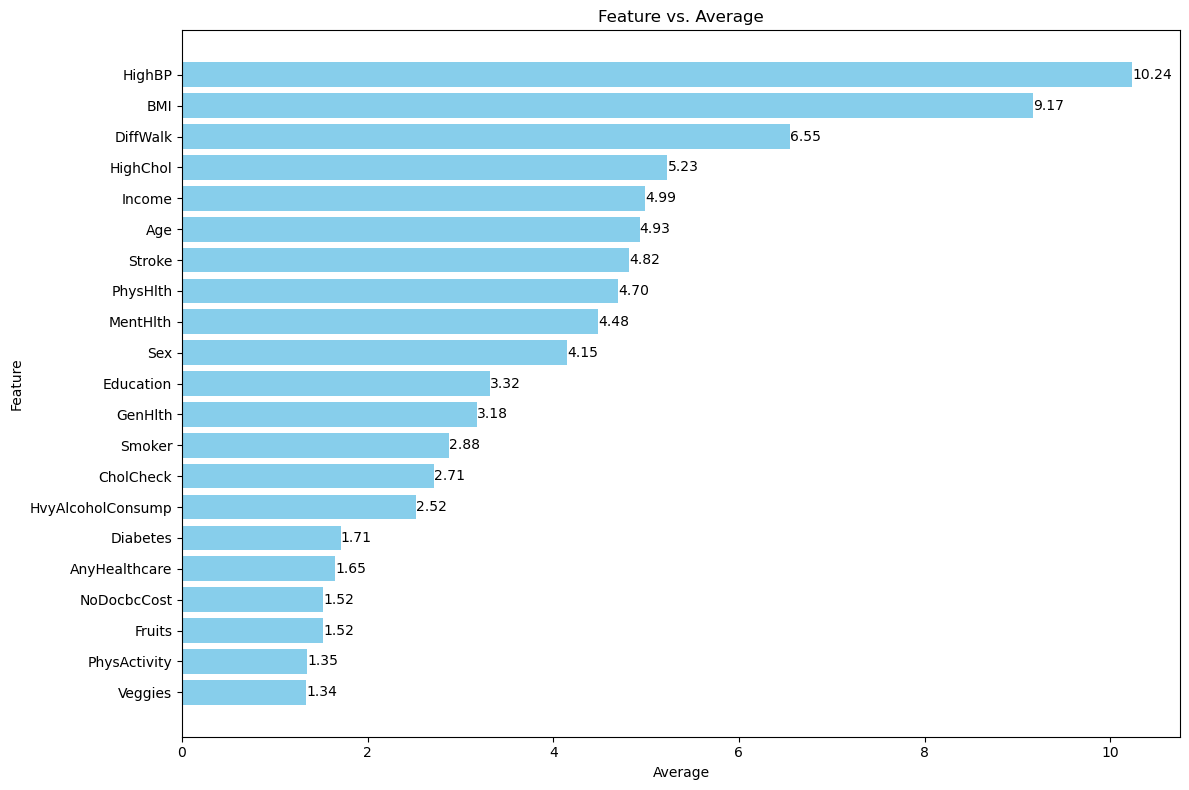

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Feature': ['HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Income', 'Age', 'Stroke', 'PhysHlth', 'MentHlth', 'Sex', 'Education', 'GenHlth', 'Smoker', 'CholCheck', 'HvyAlcoholConsump', 'Diabetes', 'AnyHealthcare', 'NoDocbcCost', 'Fruits', 'PhysActivity', 'Veggies'],
    'Average': [10.24, 9.17, 6.55, 5.23, 4.99, 4.93, 4.82, 4.70, 4.48, 4.15, 3.32, 3.18, 2.88, 2.71, 2.52, 1.71, 1.65, 1.52, 1.52, 1.35, 1.34]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Sort the DataFrame by 'Average' in descending order
df = df.sort_values(by='Average', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(df['Feature'], df['Average'], color='skyblue')
plt.xlabel('Average')
plt.ylabel('Feature')
plt.title('Feature vs. Average')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top

# Annotate the bars with their values
for i, v in enumerate(df['Average']):
    plt.text(v, i, f'{v:.2f}', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [126]:
print('TOP 10 Features is'+'  '+ a[0:9]['Feature'])
XGTT10=XGT[0:9]['Feature']

9       TOP 10 Features is  HighBP
2          TOP 10 Features is  BMI
5     TOP 10 Features is  DiffWalk
10    TOP 10 Features is  HighChol
12      TOP 10 Features is  Income
0          TOP 10 Features is  Age
19      TOP 10 Features is  Stroke
16    TOP 10 Features is  PhysHlth
13    TOP 10 Features is  MentHlth
Name: Feature, dtype: object


In [127]:
FTT10

5     DiffWalk
9       HighBP
19      Stroke
16    PhysHlth
10    HighChol
4     Diabetes
12      Income
8      GenHlth
18      Smoker
Name: Feature, dtype: object

In [93]:
import shap
# Calculate SHAP values for your XGBoost model.
explainer = shap.Explainer(clf)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


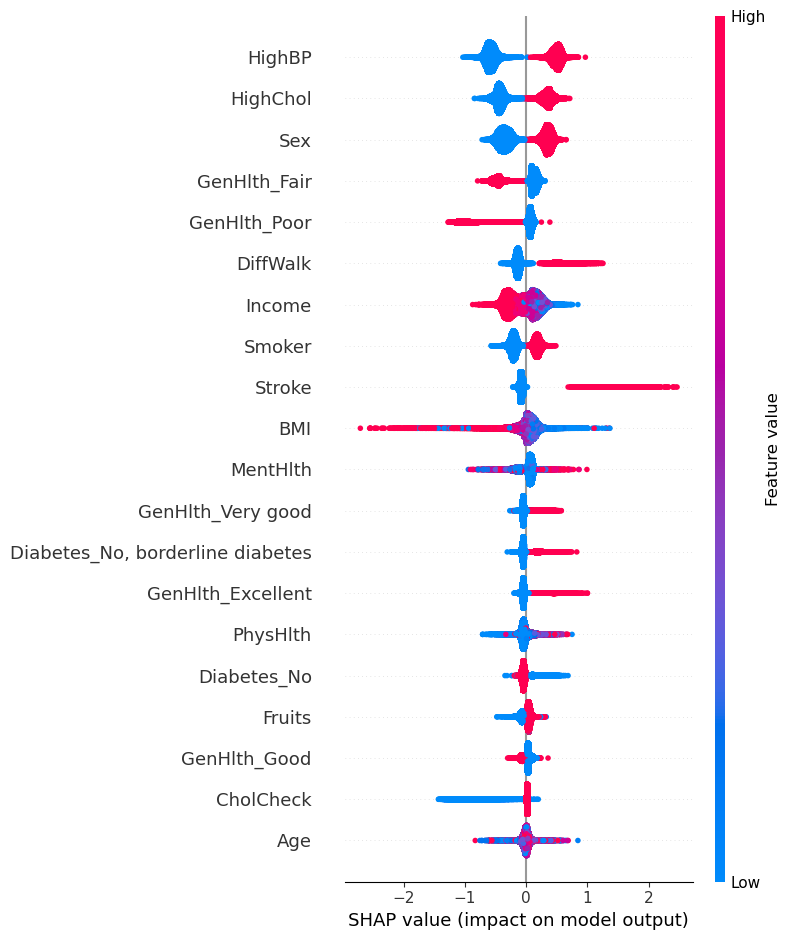

In [94]:
# Visualize SHAP values using a summary plot.
shap.summary_plot(shap_values, X, show=False)

# Show the plot.
plt.show()

## Using TabNet

Device used : cpu
No early stopping will be performed, last training weights will be used.


epoch 0  | loss: 0.28448 |  0:00:29s
epoch 1  | loss: 0.26126 |  0:00:57s
epoch 2  | loss: 0.25669 |  0:01:25s
epoch 3  | loss: 0.25366 |  0:01:51s
epoch 4  | loss: 0.25257 |  0:02:19s
epoch 5  | loss: 0.25121 |  0:02:47s
epoch 6  | loss: 0.25112 |  0:03:16s
epoch 7  | loss: 0.25028 |  0:03:43s
epoch 8  | loss: 0.25018 |  0:04:14s
epoch 9  | loss: 0.24972 |  0:04:54s
epoch 10 | loss: 0.24999 |  0:05:37s
epoch 11 | loss: 0.24897 |  0:06:29s
epoch 12 | loss: 0.24886 |  0:07:11s
epoch 13 | loss: 0.24885 |  0:07:51s
epoch 14 | loss: 0.24857 |  0:08:35s
epoch 15 | loss: 0.25011 |  0:09:14s
epoch 16 | loss: 0.24974 |  0:09:50s
epoch 17 | loss: 0.2486  |  0:10:28s
epoch 18 | loss: 0.24886 |  0:11:09s
epoch 19 | loss: 0.2485  |  0:11:40s
epoch 20 | loss: 0.24856 |  0:12:23s
epoch 21 | loss: 0.24824 |  0:13:00s
epoch 22 | loss: 0.24808 |  0:13:31s
epoch 23 | loss: 0.24839 |  0:14:13s
epoch 24 | loss: 0.24808 |  0:14:48s
epoch 25 | loss: 0.24795 |  0:15:34s
epoch 26 | loss: 0.24805 |  0:16:19s
e

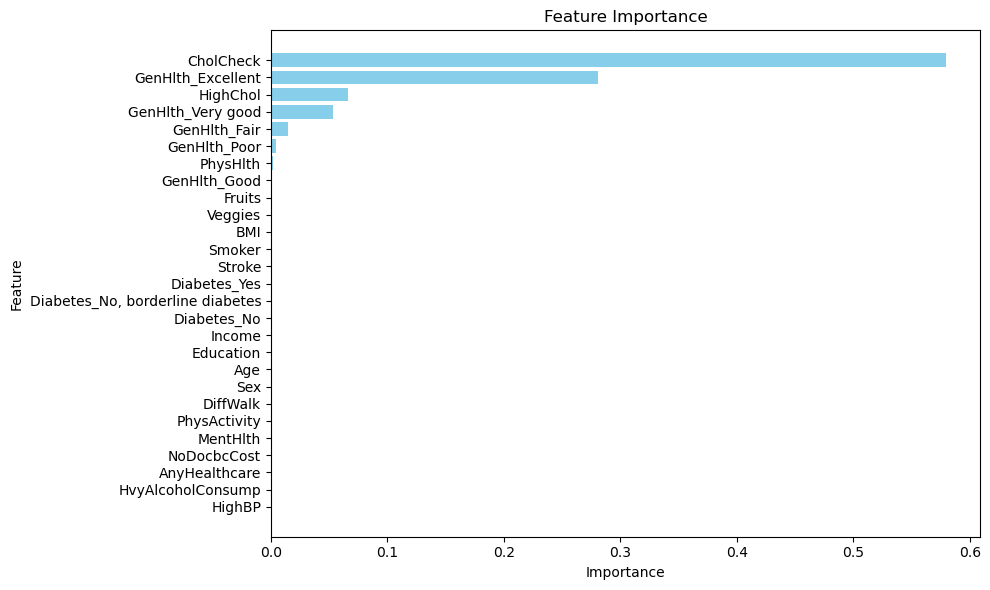

In [140]:
import pandas as pd
from pytorch_tabnet.tab_model import TabNetClassifier
import matplotlib.pyplot as plt

# Split the dataset into features (X) and the target variable (y).
X = df.drop('CHD', axis=1)  # Features
y = df['CHD']  # Target variable
# Create a TabNetClassifier model
tabN = TabNetClassifier()

# Train the model on your data
tabN.fit(X.values, y.values, max_epochs=100)  # You can adjust the number of epochs as needed
# Get feature importance scores from the model
feature_importances = tabN.feature_importances_
# Create a DataFrame to store feature names and importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Create a bar plot to visualize feature importances


In [142]:
imm=importance_df
imm['Feature'] = imm['Feature'].str.split('_').str[0]
imm=imm.groupby('Feature').mean().reset_index()
imm

,Feature,Importance
0,Age,0.000000
1,AnyHealthcare,0.000000
2,BMI,0.000000
3,CholCheck,0.579676
4,Diabetes,0.000000
5,DiffWalk,0.000000
6,Education,0.000000
7,Fruits,0.000000
8,GenHlth,0.070537
9,HighBP,0.000000


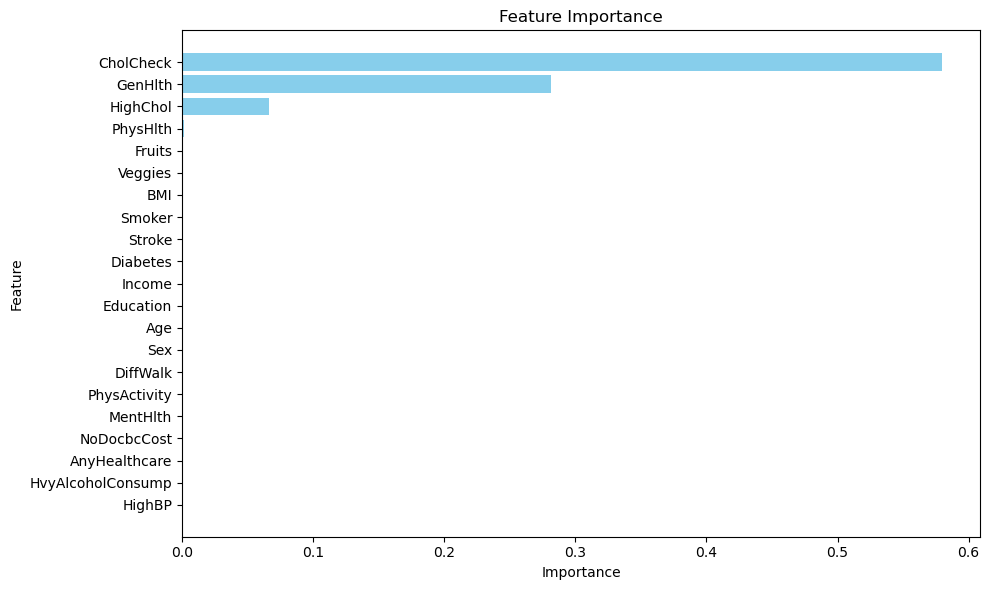

In [148]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.tight_layout()
plt.show()

In [147]:
imm.sort_values(by='Importance', ascending=False)[0:9]

,Feature,Importance
3,CholCheck,0.579676
8,GenHlth,0.070537
10,HighChol,0.065991
16,PhysHlth,0.001647
12,Income,0.000000
19,Stroke,0.000000
18,Smoker,0.000000
17,Sex,0.000000
15,PhysActivity,0.000000


## others

In [203]:
import pandas as pd
from xgboost import XGBClassifier
df = pd.read_csv('CHD.csv')
# encode 'AgeCategory' column
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['Age'] = df['Age'].apply(lambda x: encode_AgeCategory[x])
df['Age'] = df['Age'].astype(int)
le = LabelEncoder()
# Get a list of categorical column names
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    if len(df[col].unique()) <= 2:
        # label encode binary variables
        df[col] = le.fit_transform(df[col])
    else:
        # one-hot encode non-binary variables
        df = pd.get_dummies(df, columns=[col])

data_values = df.drop(['CHD','HighBP','BMI','HighChol'], axis=1)
X = data_values.drop('DiffWalk',  axis=1)  # Features
y = data_values['DiffWalk']  # Target variable
clf = XGBClassifier()
clf.fit(X, y)
importance_dict = clf.get_booster().get_score(importance_type='total_gain')
total_gain_sum = sum(importance_dict.values())
importance_dict1 = clf.get_booster().get_score(importance_type='total_cover')
total_cover_sum = sum(importance_dict1.values())
importance_dict2 = clf.get_booster().get_score(importance_type='weight')
total_weight_sum = sum(importance_dict2.values())
importances_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Gain'])
importances_df['Weight'] = importances_df['Feature'].apply(lambda x: clf.get_booster().get_score().get(x, 0))
importances_df['Cover'] = importances_df['Feature'].apply(lambda x: clf.get_booster().get_score(importance_type='cover').get(x, 0))
# Convert importance values to percentages
importances_df['Gain'] = (importances_df['Gain'] / total_gain_sum) * 100
importances_df['Weight'] = (importances_df['Weight'] / total_weight_sum) * 100
importances_df['Cover'] = (importances_df['Cover'] / total_gain_sum) * 100
importances_df.sort_values('Gain', ascending=False, inplace=True)
importances_df.reset_index(drop=True, inplace=True)
average_importances = importances_df.mean()
print(importances_df)
print(average_importances)

                             Feature       Gain     Weight     Cover
0                           PhysHlth  52.672632  13.306720  2.019776
1                             Income  10.146658  10.861610  1.722532
2                  GenHlth_Very good   7.876575   2.195609  2.128685
3                  GenHlth_Excellent   5.170291   1.746507  2.243260
4                       PhysActivity   4.110112   3.858949  1.783590
5                       GenHlth_Good   2.886580   2.295409  1.783004
6                       GenHlth_Poor   2.404986   1.480373  3.055862
7                       GenHlth_Fair   2.115111   1.879574  1.913073
8                        Diabetes_No   1.674427   1.713240  1.872690
9                           MentHlth   1.622498  12.408516  1.585173
10                               Age   1.517177  14.138390  1.232020
11                            Stroke   1.481657   3.077179  1.388213
12                               Sex   1.114008   3.542914  1.317823
13  Diabetes_No, borderline diabet

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [204]:
im=importances_df
im['Feature'] = im['Feature'].str.split('_').str[0]
im=im.groupby('Feature').mean().reset_index()
im1=im
im1['Gain'] = im1['Gain'].astype(float)
im1['Weight'] = im1['Weight'].astype(float)
im1['Cover'] = im['Cover'].astype(float)
im1['Average'] = (im1['Gain'] + im1['Weight'] + im1['Cover']) / 3
im1.sort_values('Average', ascending=False, inplace=True)
im1

,Feature,Gain,Weight,Cover,Average
12,PhysHlth,52.672632,13.306720,2.019776,22.666376
8,Income,10.146658,10.861610,1.722532,7.576934
0,Age,1.517177,14.138390,1.232020,5.629195
9,MentHlth,1.622498,12.408516,1.585173,5.205396
4,Education,1.006847,7.568197,1.524298,3.366447
11,PhysActivity,4.110112,3.858949,1.783590,3.250884
6,GenHlth,4.090709,1.919494,2.224777,2.744993
13,Sex,1.114008,3.542914,1.317823,1.991582
15,Stroke,1.481657,3.077179,1.388213,1.982350
1,AnyHealthcare,0.741687,2.195609,2.199921,1.712406


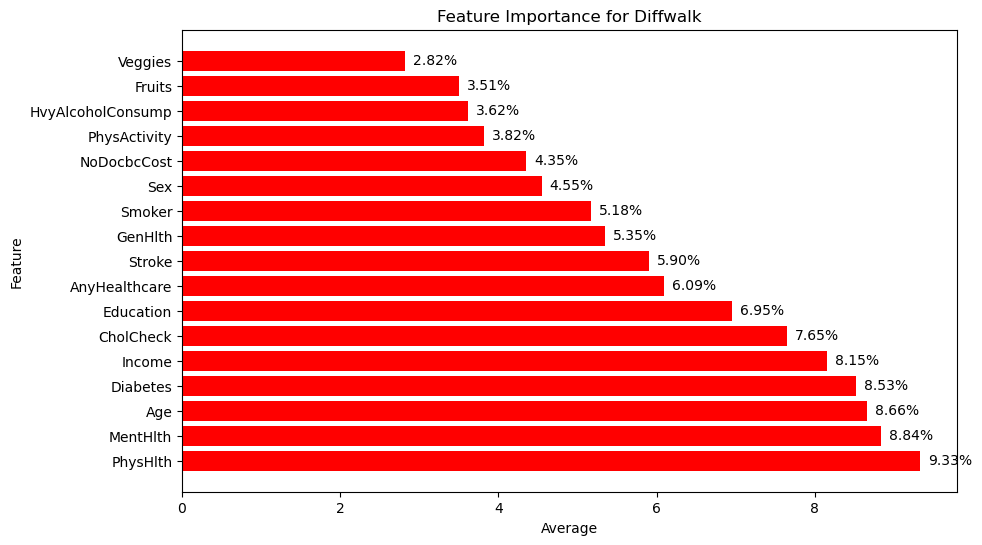

In [209]:
import matplotlib.pyplot as plt

# Data
data=im1

# Create DataFrame
df = pd.DataFrame(data)

# Sort DataFrame by 'Average' column
df = df.sort_values('Average', ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bars
plt.barh(df['Feature'], df['Average'], color='red')

# Add value labels to the bars
for i, value in enumerate(df['Average']):
    plt.text(value + 0.1, i, f"{value:.2f}%", va='center')

# Set labels and title
plt.xlabel('Average')
plt.ylabel('Feature')
plt.title('Feature Importance for Diffwalk')

# Show the plot
plt.show()


In [206]:
import pandas as pd
from xgboost import XGBClassifier
df = pd.read_csv('CHD.csv')
# encode 'AgeCategory' column
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['Age'] = df['Age'].apply(lambda x: encode_AgeCategory[x])
df['Age'] = df['Age'].astype(int)
le = LabelEncoder()
# Get a list of categorical column names
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    if len(df[col].unique()) <= 2:
        # label encode binary variables
        df[col] = le.fit_transform(df[col])
    else:
        # one-hot encode non-binary variables
        df = pd.get_dummies(df, columns=[col])

data_values = df.drop(['CHD','HighBP','BMI','DiffWalk'], axis=1)
X = data_values.drop('HighChol',  axis=1)  # Features
y = data_values['HighChol']  # Target variable
clf = XGBClassifier()
clf.fit(X, y)
importance_dict = clf.get_booster().get_score(importance_type='total_gain')
total_gain_sum = sum(importance_dict.values())
importance_dict1 = clf.get_booster().get_score(importance_type='total_cover')
total_cover_sum = sum(importance_dict1.values())
importance_dict2 = clf.get_booster().get_score(importance_type='weight')
total_weight_sum = sum(importance_dict2.values())
importances_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Gain'])
importances_df['Weight'] = importances_df['Feature'].apply(lambda x: clf.get_booster().get_score().get(x, 0))
importances_df['Cover'] = importances_df['Feature'].apply(lambda x: clf.get_booster().get_score(importance_type='cover').get(x, 0))
# Convert importance values to percentages
importances_df['Gain'] = (importances_df['Gain'] / total_gain_sum) * 100
importances_df['Weight'] = (importances_df['Weight'] / total_weight_sum) * 100
importances_df['Cover'] = (importances_df['Cover'] / total_gain_sum) * 100
importances_df.sort_values('Gain', ascending=False, inplace=True)
importances_df.reset_index(drop=True, inplace=True)
average_importances = importances_df.mean()
print(importances_df)
print(average_importances)

                             Feature       Gain     Weight      Cover
0                        Diabetes_No  36.019023   1.204422  18.295276
1                       GenHlth_Poor  12.782806   1.616895  15.879940
2                           PhysHlth   5.628416  12.357697  10.013907
3                       GenHlth_Fair   5.588445   2.062366   7.662170
4                          CholCheck   4.650645   1.765385  16.535565
5                             Income   4.178347  11.285266   8.995237
6                                Age   4.028421  14.436562   7.525260
7                           MentHlth   3.926326  11.648243  10.958628
8                             Smoker   3.692934   3.365781   8.473218
9                          Education   2.942836   8.331958   9.575371
10                            Stroke   2.920377   1.979871  12.802205
11                     AnyHealthcare   2.469770   2.870813  12.940576
12                               Sex   2.381667   3.976242   7.288810
13                  

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [207]:
im=importances_df
im['Feature'] = im['Feature'].str.split('_').str[0]
im=im.groupby('Feature').mean().reset_index()
im1=im
im1['Gain'] = im1['Gain'].astype(float)
im1['Weight'] = im1['Weight'].astype(float)
im1['Cover'] = im['Cover'].astype(float)
im1['Average'] = (im1['Gain'] + im1['Weight'] + im1['Cover']) / 3
im1.sort_values('Average', ascending=False, inplace=True)
im1

,Feature,Gain,Weight,Cover,Average
12,PhysHlth,5.628416,12.357697,10.013907,9.333340
9,MentHlth,3.926326,11.648243,10.958628,8.844399
0,Age,4.028421,14.436562,7.525260,8.663414
3,Diabetes,12.382275,1.303415,11.890299,8.525330
8,Income,4.178347,11.285266,8.995237,8.152950
2,CholCheck,4.650645,1.765385,16.535565,7.650532
4,Education,2.942836,8.331958,9.575371,6.950055
1,AnyHealthcare,2.469770,2.870813,12.940576,6.093720
15,Stroke,2.920377,1.979871,12.802205,5.900818
6,GenHlth,4.182968,1.844580,10.027338,5.351629


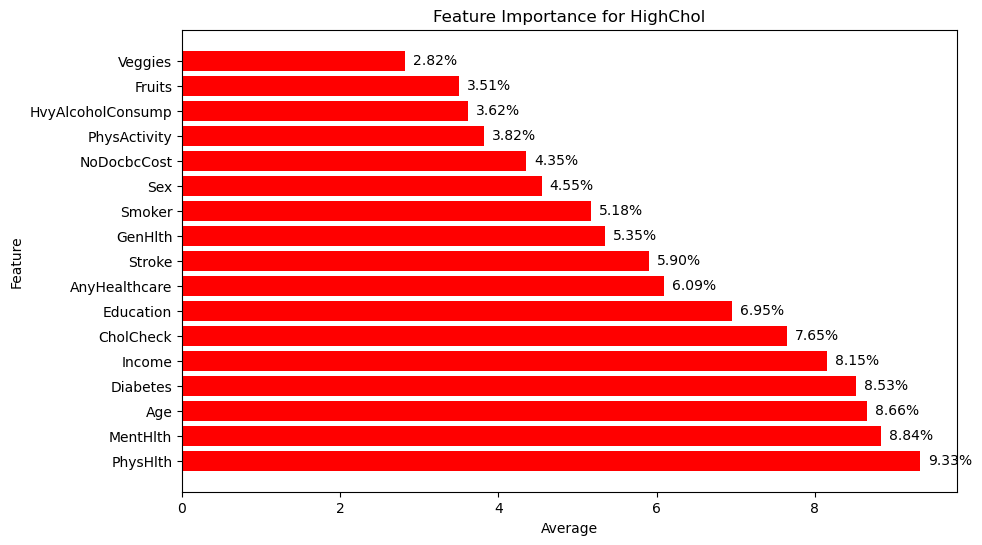

In [208]:
import matplotlib.pyplot as plt

# Data
data=im1

# Create DataFrame
df = pd.DataFrame(data)

# Sort DataFrame by 'Average' column
df = df.sort_values('Average', ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bars
plt.barh(df['Feature'], df['Average'], color='red')

# Add value labels to the bars
for i, value in enumerate(df['Average']):
    plt.text(value + 0.1, i, f"{value:.2f}%", va='center')

# Set labels and title
plt.xlabel('Average')
plt.ylabel('Feature')
plt.title('Feature Importance for HighChol')

# Show the plot
plt.show()


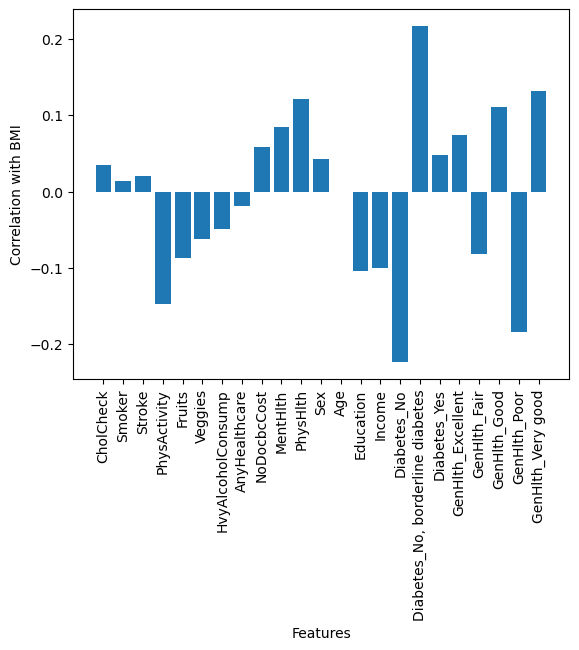

In [214]:
bmi_correlation =  X.corrwith(df['BMI'])
import matplotlib.pyplot as plt

plt.bar(bmi_correlation.index, bmi_correlation)
plt.xlabel('Features')
plt.ylabel('Correlation with BMI')
plt.xticks(rotation=90)
plt.show()

In [212]:
correlation = X.corrwith(df['BMI'])
correlation

CholCheck                           0.034495
Smoker                              0.013804
Stroke                              0.020153
PhysActivity                       -0.147294
Fruits                             -0.087518
Veggies                            -0.062275
HvyAlcoholConsump                  -0.048736
AnyHealthcare                      -0.018471
NoDocbcCost                         0.058206
MentHlth                            0.085310
PhysHlth                            0.121141
Sex                                 0.042950
Age                                -0.000530
Education                          -0.103932
Income                             -0.100069
Diabetes_No                        -0.223851
Diabetes_No, borderline diabetes    0.216843
Diabetes_Yes                        0.048327
GenHlth_Excellent                   0.073991
GenHlth_Fair                       -0.082393
GenHlth_Good                        0.111233
GenHlth_Poor                       -0.184542
GenHlth_Ve

In [51]:
import pandas as pd

# Create a DataFrame with the given data
data = {
    'Factors': [
        'Hypertension',
        'HighCholesterol',
        'BMI',
        'AgeCategory_45-49',
        'AgeCategory_80 or older',
        'SleepTime',
        'Stroke',
        'AgeCategory_70-74',
        'AgeCategory_65-69',
        'GenHealth_Very good',
        'AgeCategory_75-79',
        'GenHealth_Poor',
        'AgeCategory_30-34',
        'Diabetic_Yes',
        'AgeCategory_40-44',
        'SkinCancer',
        'GenHealth_Fair',
        'Smoking',
        'KidneyDisease',
        'GenHealth_Good',
        'AgeCategory_35-39',
        'AgeCategory_50-54',
        'Race_White',
        'Diabetic_No',
        'Sex',
        'AgeCategory_55-59',
        'AlcoholDrinking',
        'AgeCategory_25-29',
        'GenHealth_Excellent',
        'Race_Black',
        'AgeCategory_60-64',
        'Race_American Indian/Alaskan Native',
        'Race_Asian',
        'MentalHealth',
        'Race_Other',
        'Race_Hispanic',
        'AgeCategory_18-24',
        'Asthma',
        'Diabetic_No, borderline diabetes',
        'Diabetic_Yes (during pregnancy)',
        'PhysicalActivity'
    ],
    'First': [
        0.101719,
        0.090270,
        0.070214,
         0.060574,
        0.057253,
        0.056925,
        0.047099,
        0.045774,
        0.045401,
        0.044122,
        0.040855,
        0.035281,
        0.034518,
        0.029783,
        0.026947,
        0.023257,
        0.021867,
        0.018080,
        0.016923,
        0.016830,
        0.015866,
        0.015142,
        0.009102,
        0.007889,
        0.007536,
        0.006072,
        0.005006,
        0.004794,
        0.004580,
        0.004416,
        0.004122,
        0.003540,
        0.003529,
        0.003523,
        0.003338,
        0.003123,
        0.003086,
        0.003038,
        0.003002,
        0.002926,
        0.002676
    ],
    'Second': [
        0.101719,
        0.090270,
        0.070214,
         0.060574,
        0.057253,
        0.056925,
        0.047099,
        0.045774,
        0.045401,
        0.044122,
        0.040855,
        0.035281,
        0.034518,
        0.029783,
        0.026947,
        0.023257,
        0.021867,
        0.018080,
        0.016923,
        0.016830,
        0.015866,
        0.015142,
        0.009102,
        0.007889,
        0.007536,
        0.006072,
        0.005006,
        0.004794,
        0.004580,
        0.004416,
        0.004122,
        0.003540,
        0.003529,
        0.003523,
        0.003338,
        0.003123,
        0.003086,
        0.003038,
        0.003002,
        0.002926,
        0.002676
    ],
    'Third': [
        0.101719,
        0.090270,
        0.070214,
         0.060574,
        0.057253,
        0.056925,
        0.047099,
        0.045774,
        0.045401,
        0.044122,
        0.040855,
        0.035281,
        0.034518,
        0.029783,
        0.026947,
        0.023257,
        0.021867,
        0.018080,
        0.016923,
        0.016830,
        0.015866,
        0.015142,
        0.009102,
        0.007889,
        0.007536,
        0.006072,
        0.005006,
        0.004794,
        0.004580,
        0.004416,
        0.004122,
        0.003540,
        0.003529,
        0.003523,
        0.003338,
        0.003123,
        0.003086,
        0.003038,
        0.003002,
        0.002926,
        0.002676
    ],
    'Average': [
        0.101719,
        0.090270,
        0.070214,
         0.060574,
        0.057253,
        0.056925,
        0.047099,
        0.045774,
        0.045401,
        0.044122,
        0.040855,
        0.035281,
        0.034518,
        0.029783,
        0.026947,
        0.023257,
        0.021867,
        0.018080,
        0.016923,
        0.016830,
        0.015866,
        0.015142,
        0.009102,
        0.007889,
        0.007536,
        0.006072,
        0.005006,
        0.004794,
        0.004580,
        0.004416,
        0.004122,
        0.003540,
        0.003529,
        0.003523,
        0.003338,
        0.003123,
        0.003086,
        0.003038,
        0.003002,
        0.002926,
        0.002676
    ]
}

timexg = pd.DataFrame(data)

# Display the DataFrame
timexg


,Factors,First,Second,Third,Average
0,Hypertension,0.101719,0.101719,0.101719,0.101719
1,HighCholesterol,0.090270,0.090270,0.090270,0.090270
2,BMI,0.070214,0.070214,0.070214,0.070214
3,AgeCategory_45-49,0.060574,0.060574,0.060574,0.060574
4,AgeCategory_80 or older,0.057253,0.057253,0.057253,0.057253
5,SleepTime,0.056925,0.056925,0.056925,0.056925
6,Stroke,0.047099,0.047099,0.047099,0.047099
7,AgeCategory_70-74,0.045774,0.045774,0.045774,0.045774
8,AgeCategory_65-69,0.045401,0.045401,0.045401,0.045401
9,GenHealth_Very good,0.044122,0.044122,0.044122,0.044122


In [52]:
timexg['Factors'].str.split('_').str[0]
# Split the 'Factors' column by '_'
timexg[['Factors', 'Subcategory']] = timexg['Factors'].str.split('_', n=1, expand=True)

# Group by the 'Factors' column and calculate the mean for 'First', 'Second', 'Third', and 'Average'
timexg = timexg.groupby('Factors').mean().reset_index()

# Reorder the columns
xg=timexg[['Factors', 'First', 'Second', 'Third', 'Average']]
xg

,Factors,First,Second,Third,Average
0,AgeCategory,0.027723,0.027723,0.027723,0.027723
1,AlcoholDrinking,0.005006,0.005006,0.005006,0.005006
2,Asthma,0.003038,0.003038,0.003038,0.003038
3,BMI,0.070214,0.070214,0.070214,0.070214
4,Diabetic,0.010900,0.010900,0.010900,0.010900
5,GenHealth,0.024536,0.024536,0.024536,0.024536
6,HighCholesterol,0.090270,0.090270,0.090270,0.090270
7,Hypertension,0.101719,0.101719,0.101719,0.101719
8,KidneyDisease,0.016923,0.016923,0.016923,0.016923
9,MentalHealth,0.003523,0.003523,0.003523,0.003523


In [53]:
# Sort the DataFrame in descending order based on the 'Average' column
df_sorted = xg.sort_values('Average', ascending=False)
print(df_sorted)

             Factors     First    Second     Third   Average
7       Hypertension  0.101719  0.101719  0.101719  0.101719
6    HighCholesterol  0.090270  0.090270  0.090270  0.090270
3                BMI  0.070214  0.070214  0.070214  0.070214
14         SleepTime  0.056925  0.056925  0.056925  0.056925
16            Stroke  0.047099  0.047099  0.047099  0.047099
0        AgeCategory  0.027723  0.027723  0.027723  0.027723
5          GenHealth  0.024536  0.024536  0.024536  0.024536
13        SkinCancer  0.023257  0.023257  0.023257  0.023257
15           Smoking  0.018080  0.018080  0.018080  0.018080
8      KidneyDisease  0.016923  0.016923  0.016923  0.016923
4           Diabetic  0.010900  0.010900  0.010900  0.010900
12               Sex  0.007536  0.007536  0.007536  0.007536
1    AlcoholDrinking  0.005006  0.005006  0.005006  0.005006
11              Race  0.004508  0.004508  0.004508  0.004508
9       MentalHealth  0.003523  0.003523  0.003523  0.003523
2             Asthma  0.

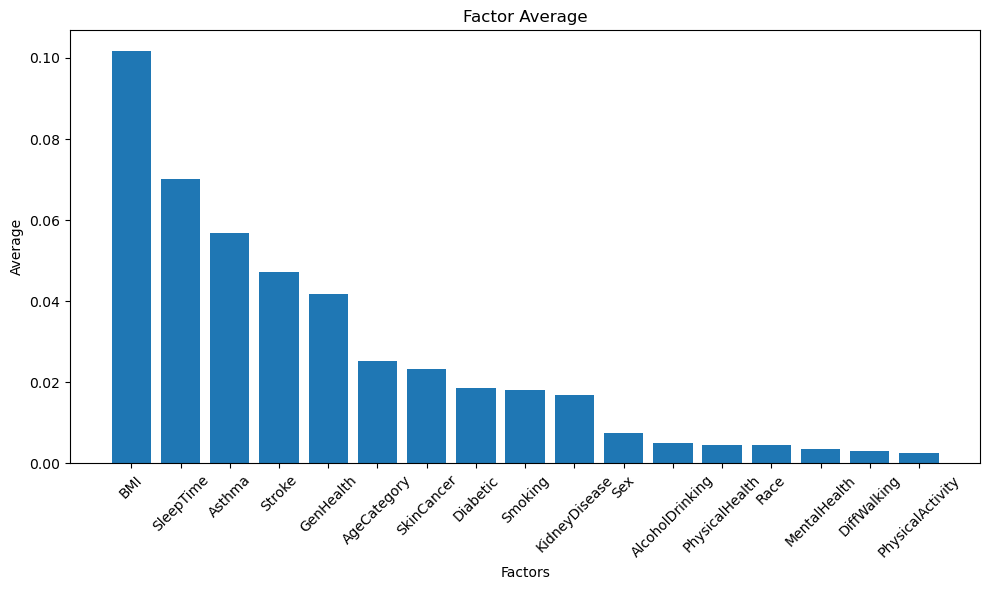

In [33]:
# Create the bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Factors'], df_sorted['Average'])
plt.xticks(rotation=45)
plt.xlabel('Factors')
plt.ylabel('Average')
plt.title('Factor Average')
plt.tight_layout()
# Show the plot
plt.show()

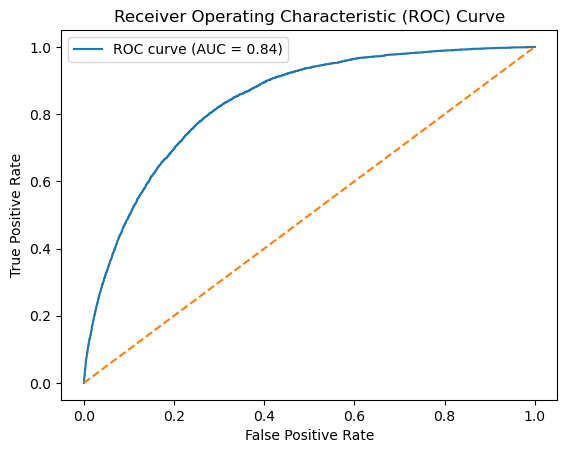

In [45]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = df  # Replace 'your_dataset.csv' with the actual filename or path

# Prepare the data
X = data.drop('CHD', axis=1)  # Features
y = data['CHD']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
clf = XGBClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute model accuracy statistics
auroc = roc_auc_score(y_test, y_pred_proba)

# Calculate the false positive rate and true positive rate for different threshold levels
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(['ROC curve (AUC = %0.2f)' % auroc])
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


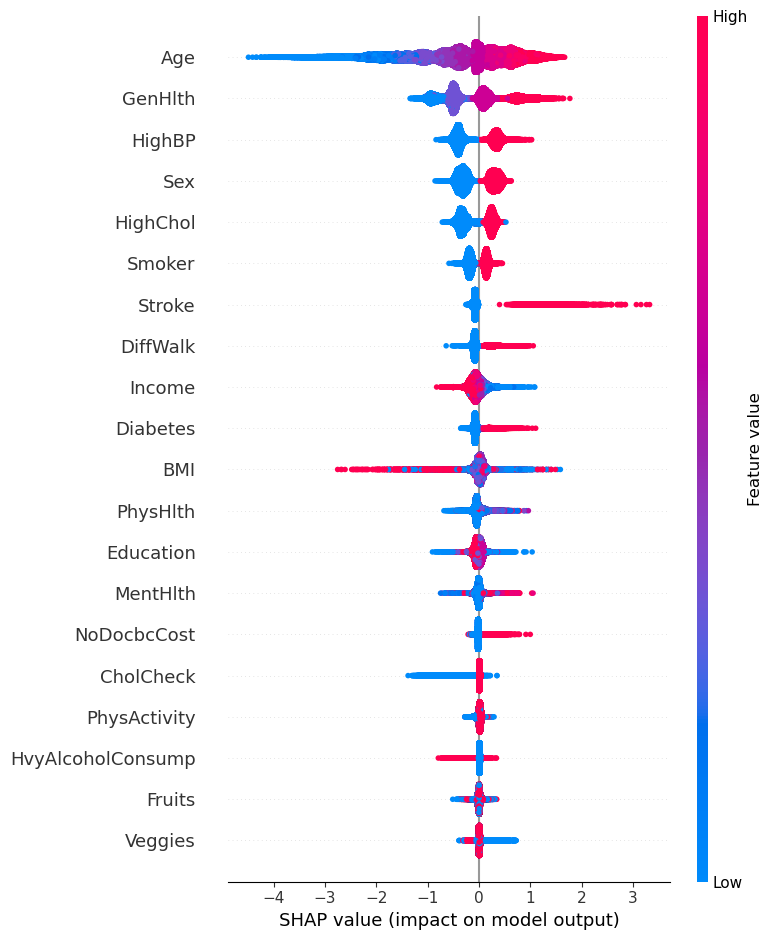

In [34]:
df_sorted[df_sorted['Average']>=0.01]['Factors']

3               BMI
14        SleepTime
2            Asthma
16           Stroke
6         GenHealth
0       AgeCategory
13       SkinCancer
4          Diabetic
15          Smoking
7     KidneyDisease
Name: Factors, dtype: object

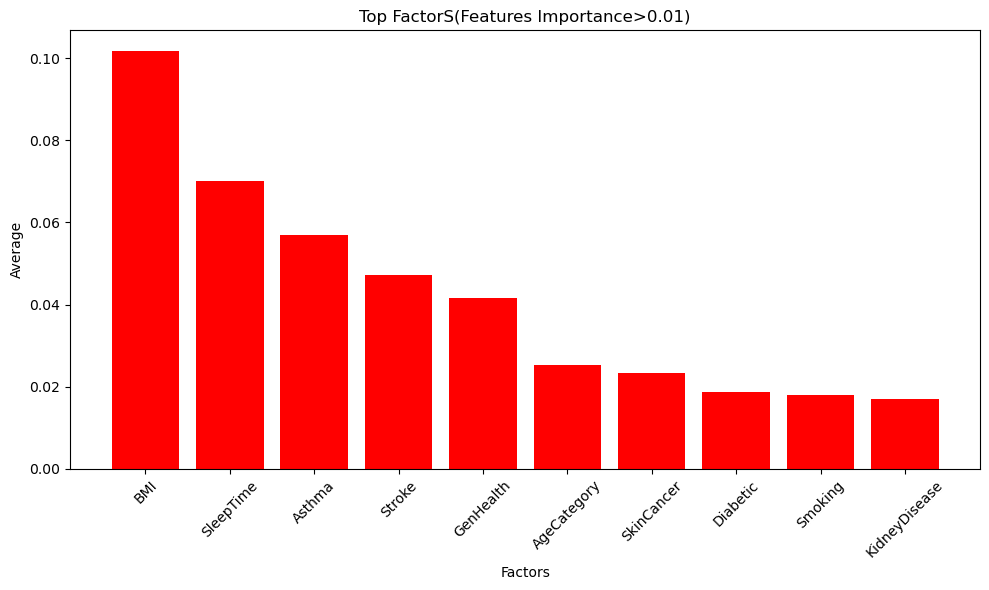

In [35]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_sorted[df_sorted['Average']>=0.01]['Factors'], df_sorted[df_sorted['Average']>=0.01]['Average'],color='red')
plt.xticks(rotation=45)
plt.xlabel('Factors')
plt.ylabel('Average')
plt.title('Top FactorS(Features Importance>0.01)')
plt.tight_layout()
# Show the plot
plt.show()

In [31]:
#RandomForestClassifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# Load the dataset
dataset = df  # Replace 'your_dataset.csv' with your actual dataset filename
# Prepare the data
X = dataset.drop('CHD', axis=1)  # Features (all columns except 'CHD')
y = dataset['CHD']  # Target variable ('CHD' column)
# Create an instance of the logistic regression model
model = RandomForestClassifier()
# Fit the model to the data
model.fit(X, y)
importances = model.feature_importances_
associationsRF = pd.DataFrame({'Factors': X.columns, 'Importance': importances})
associationsRF.sort_values('Importance', ascending=False, inplace=True)
print(associationsRF)

                                Factors  Importance
0                                   BMI    0.355779
9                             SleepTime    0.111691
4                        PhysicalHealth    0.078929
5                          MentalHealth    0.068186
3                                Stroke    0.027513
8                      PhysicalActivity    0.025391
6                           DiffWalking    0.024578
7                                   Sex    0.022237
10                               Asthma    0.021462
1                               Smoking    0.019870
25              AgeCategory_80 or older    0.016805
12                           SkinCancer    0.015700
11                        KidneyDisease    0.015149
39                       GenHealth_Poor    0.014615
34                         Diabetic_Yes    0.013542
37                       GenHealth_Fair    0.012841
32                          Diabetic_No    0.011832
31                           Race_White    0.011758
24          

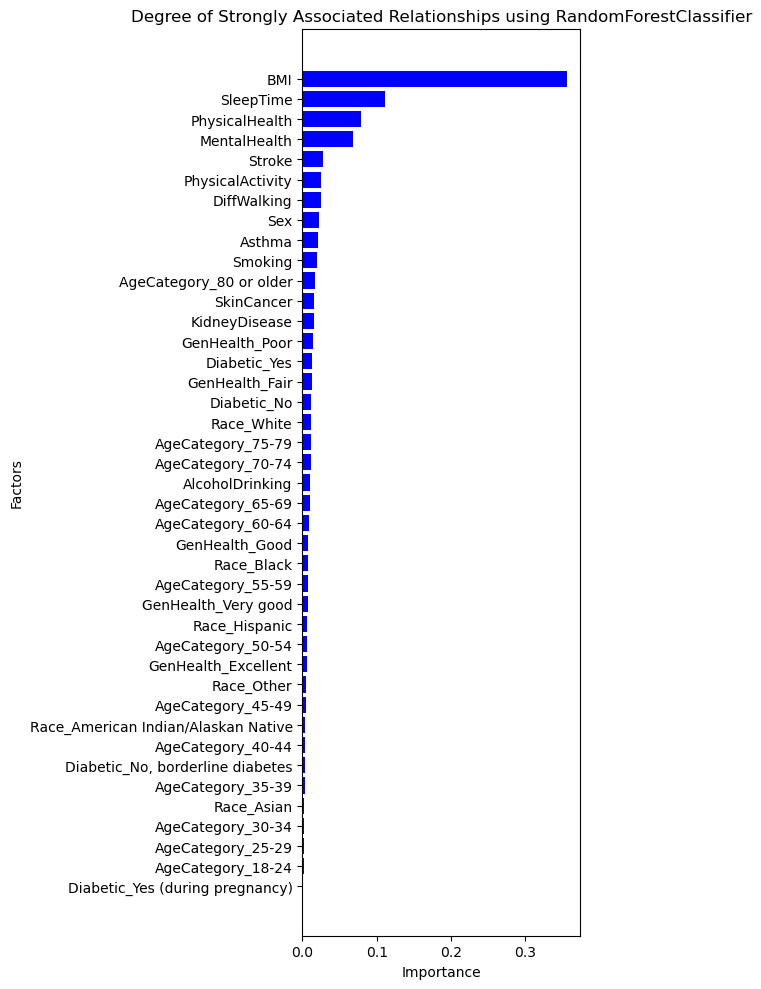

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
associationsRF.sort_values('Importance', inplace=True)
fig, ax = plt.subplots(figsize=(6, 10))
# Create the bar plot
plt.barh(associationsRF['Factors'], associationsRF['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Factors')
plt.title('Degree of Strongly Associated Relationships using RandomForestClassifier')
plt.tight_layout()
# Display the plot
plt.show()

In [33]:
#DecisionTree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = df  # Replace 'your_dataset.csv' with the actual filename or path

# Prepare the data
X = data.drop('CHD', axis=1)  # Features
y = data['CHD']  # Target variable

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Calculate feature importances
importances = clf.feature_importances_

# Create the table of strongly associated relationships
associationsDT = pd.DataFrame({'Factors': X.columns, 'Importance': importances})
associationsDT = associationsDT.sort_values('Importance', ascending=False)

# Print the table of strongly associated relationships
print(associationsDT)

                                Factors  Importance
0                                   BMI    0.364291
9                             SleepTime    0.104018
4                        PhysicalHealth    0.073627
5                          MentalHealth    0.066261
6                           DiffWalking    0.041640
8                      PhysicalActivity    0.031202
3                                Stroke    0.027753
1                               Smoking    0.024158
12                           SkinCancer    0.022379
10                               Asthma    0.021927
34                         Diabetic_Yes    0.017150
7                                   Sex    0.016981
25              AgeCategory_80 or older    0.014292
11                        KidneyDisease    0.013486
31                           Race_White    0.012874
23                    AgeCategory_70-74    0.010858
24                    AgeCategory_75-79    0.010806
2                       AlcoholDrinking    0.010420
39          

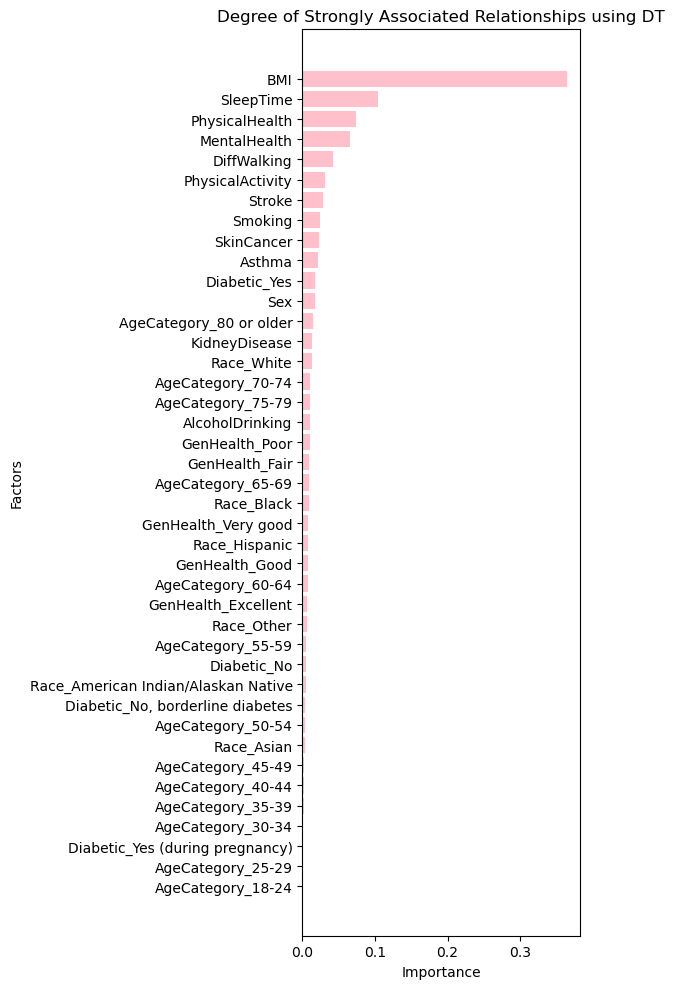

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
associationsDT.sort_values('Importance', inplace=True)
fig, ax = plt.subplots(figsize=(6, 10))
# Create the bar plot
plt.barh(associationsDT['Factors'], associationsDT['Importance'], color='pink')
plt.xlabel('Importance')
plt.ylabel('Factors')
plt.title('Degree of Strongly Associated Relationships using DT')
plt.tight_layout()
# Display the plot
plt.show()

In [ ]:
df1 = associationsXG.sort_values('Importance', ascending=False)
df2 = associationsRF.sort_values('Importance', ascending=False)
df3=associationsDT.sort_values('Importance', ascending=False)


In [47]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = df  # Replace 'your_dataset.csv' with the actual filename or path

# Prepare the data
X = data.drop('CHD', axis=1)  # Features
y = data['CHD']  # Target variable

# Initialize an empty list to store feature importances
all_importances = []

# Run feature importance calculation three times
for _ in range(3):
    # Initialize and train the decision tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(X, y)

    # Calculate feature importances
    importances = clf.feature_importances_
    
    # Append the importances to the list
    all_importances.append(importances)

# Calculate the average feature importances across the three runs
average_importances = pd.DataFrame(all_importances).mean().values

# Create the table of strongly associated relationships
associationsDT = pd.DataFrame({'Factors': X.columns, 'Importance': average_importances})
associationsDT = associationsDT.sort_values('Importance', ascending=False)

# Print the table of strongly associated relationships
print(associationsDT)


                                Factors  Importance
0                                   BMI    0.361654
9                             SleepTime    0.104194
4                        PhysicalHealth    0.075055
5                          MentalHealth    0.066069
6                           DiffWalking    0.041640
8                      PhysicalActivity    0.031146
3                                Stroke    0.027753
1                               Smoking    0.023812
12                           SkinCancer    0.022930
10                               Asthma    0.022002
7                                   Sex    0.017172
34                         Diabetic_Yes    0.017065
25              AgeCategory_80 or older    0.014182
11                        KidneyDisease    0.013544
31                           Race_White    0.013052
2                       AlcoholDrinking    0.010916
24                    AgeCategory_75-79    0.010826
23                    AgeCategory_70-74    0.010705
39          

In [43]:
df1 = strong_associations.sort_values('Importance', ascending=False)[0:14]
df2 = associationsDT.sort_values('Importance', ascending=False)[0:14]
df3=relationship_table.sort_values('Importance', ascending=False)[0:14]
df4=importance_table.sort_values('Importance', ascending=False)[0:14]
df5=associationsLR.sort_values('Importance', ascending=False)[0:14]
comb=pd.concat([df1, df2,df3,df4,df5])
aa=comb['Factors'].value_counts()
# Convert the dictionary into a DataFrame with two columns
df = pd.DataFrame(aa.items(), columns=['Factors', 'Frequencies'])
# Display the resulting DataFrame
df[df['Frequencies']>=3]['Factors']

0             Stroke
1     GenHealth_Poor
2            Smoking
3                Sex
4        AgeCategory
5        DiffWalking
6                BMI
7       Diabetic_Yes
8     GenHealth_Fair
9       MentalHealth
10     KidneyDisease
11        SkinCancer
12    PhysicalHealth
13         SleepTime
Name: Factors, dtype: object

In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('CHD.csv')
df

,CHD,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,0,1,1,1,18,0,0,2,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [5]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier

# Load the dataset
data = df  # Replace 'your_dataset.csv' with the actual filename or path

# Prepare the data
X = data.drop('CHD', axis=1)  # Features
y = data['CHD']  # Target variable

ada_clf = AdaBoostClassifier()

# Fit the AdaBoost classifier
ada_clf.fit(X, y)

# Calculate feature importances
importances = ada_clf.feature_importances_
# Create the table of strongly associated relationships
associationsDT = pd.DataFrame({'Factors': X.columns, 'Importance': importances})
associationsDT = associationsDT.sort_values('Importance', ascending=False)

# Display the feature importances
associationsDT


,Factors,Importance
18,Age,0.40
13,GenHlth,0.18
0,HighBP,0.06
1,HighChol,0.04
17,Sex,0.04
16,DiffWalk,0.04
20,Income,0.04
5,Stroke,0.04
6,Diabetes,0.02
12,NoDocbcCost,0.02
